In [1]:
from mapbuilder import MapBuilder
from invprojection import  RBFinv, Pinv_ilamp, NNinv_torch
from sklearn.preprocessing import maxabs_scale, MinMaxScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


/home/peyote/workspace/map_builder/mapbuilder/tools.py:66: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/peyote/workspace/map_builder/mapbuilder/tools.py:140: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
2024-11-11 18:56:55.357663: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical resul

In [2]:
X, y = make_blobs(n_samples=800, centers=4, n_features=10, random_state=42)
X = maxabs_scale(X)
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# X = np.array(X)
# y = np.array(y)
# X = X.astype('float32') / 255.
# y = y.astype('int')
# X, _, y, _ = train_test_split(X, y, train_size=3000, test_size=2000, random_state=420)
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

device:  cuda:0
Epoch 1/150, Loss: 0.47635174
Epoch 2/150, Loss: 0.28665758
Epoch 3/150, Loss: 0.28159527
Epoch 4/150, Loss: 0.27966086
Epoch 5/150, Loss: 0.27833785
Epoch 6/150, Loss: 0.27787077
Epoch 7/150, Loss: 0.27717115
Epoch 8/150, Loss: 0.27705850
Epoch 9/150, Loss: 0.27712232
Epoch 10/150, Loss: 0.27721139
Epoch 11/150, Loss: 0.27726450
Epoch 12/150, Loss: 0.27687670
Epoch 13/150, Loss: 0.27651801
Epoch 14/150, Loss: 0.27627670
Epoch 15/150, Loss: 0.27617092
Epoch 16/150, Loss: 0.27619376
Epoch 17/150, Loss: 0.27623862
Epoch 18/150, Loss: 0.27619799
Epoch 19/150, Loss: 0.27265294
Epoch 20/150, Loss: 0.26225693
Epoch 21/150, Loss: 0.24775220
Epoch 22/150, Loss: 0.23891625
Epoch 23/150, Loss: 0.23639903
Epoch 24/150, Loss: 0.23312347
Epoch 25/150, Loss: 0.21823052
Epoch 26/150, Loss: 0.19245581
Epoch 27/150, Loss: 0.18887669
Epoch 28/150, Loss: 0.18711174
Epoch 29/150, Loss: 0.18104103
Epoch 30/150, Loss: 0.17964085
Epoch 31/150, Loss: 0.17919673
Epoch 32/150, Loss: 0.17900408
E

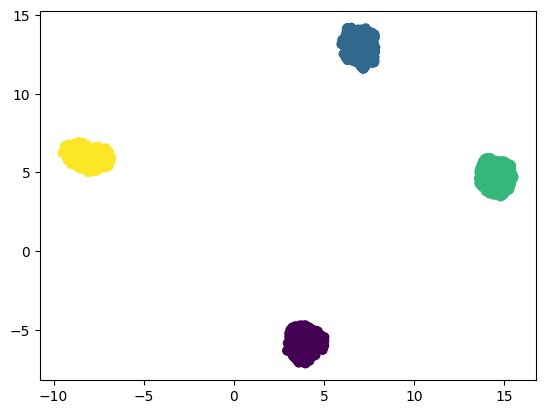

In [3]:
P = UMAP(n_components=2)

# X2D = TSNE(n_components=2).fit_transform(X)
X2D = P.fit_transform(X)
plt.scatter(X2D[:, 0], X2D[:, 1], c=y)
Pinv = NNinv_torch(dims=[128, 256, 512, 1024])
# Pinv = NNinv_torch()
# Pinv = RBFinv()
# Pinv = Pinv_ilamp()
Pinv.fit(X2D, X)



In [4]:
builder = MapBuilder(Pinv, None, X2d=X2D, X=X, y=y, scaling=0.9, P=P)

n_classes: 4
150


Loss: 0.8089: 100%|██████████| 150/150 [00:00<00:00, 162.79it/s]


relace the label with the gradient
relace the label with the dist_map


len(q) = 0:   2%|▏         | 1/50 [00:00<00:02, 22.87it/s]


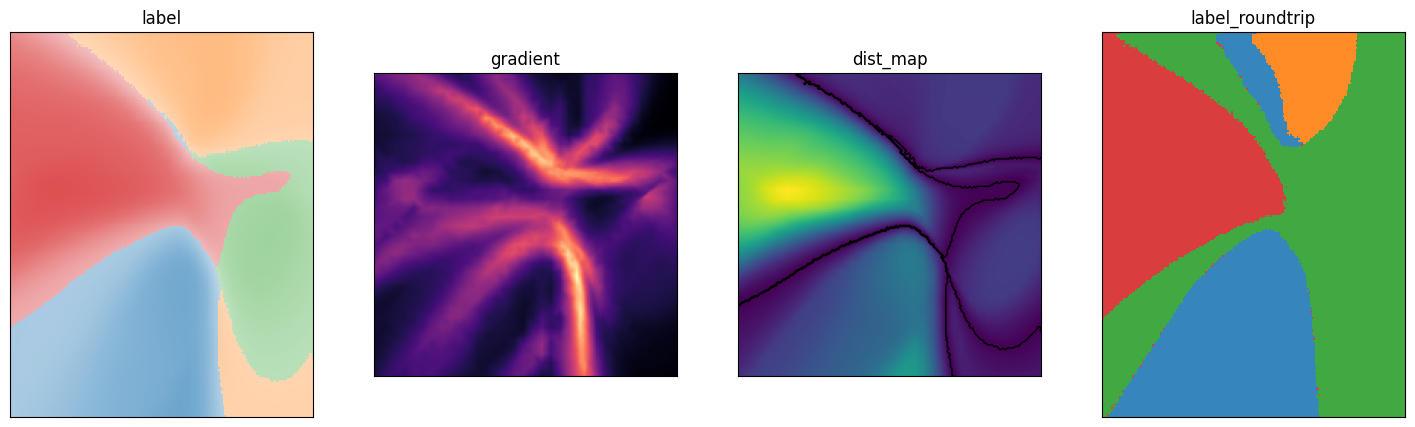

In [5]:
conten_list = ['label', 'gradient',  'dist_map', 'label_roundtrip',]
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=200)
    ax[i].set_title(content)

relace the label with the gradient
relace the label with the dist_map


len(q) = 0:   2%|▏         | 1/50 [00:00<00:00, 302.34it/s]


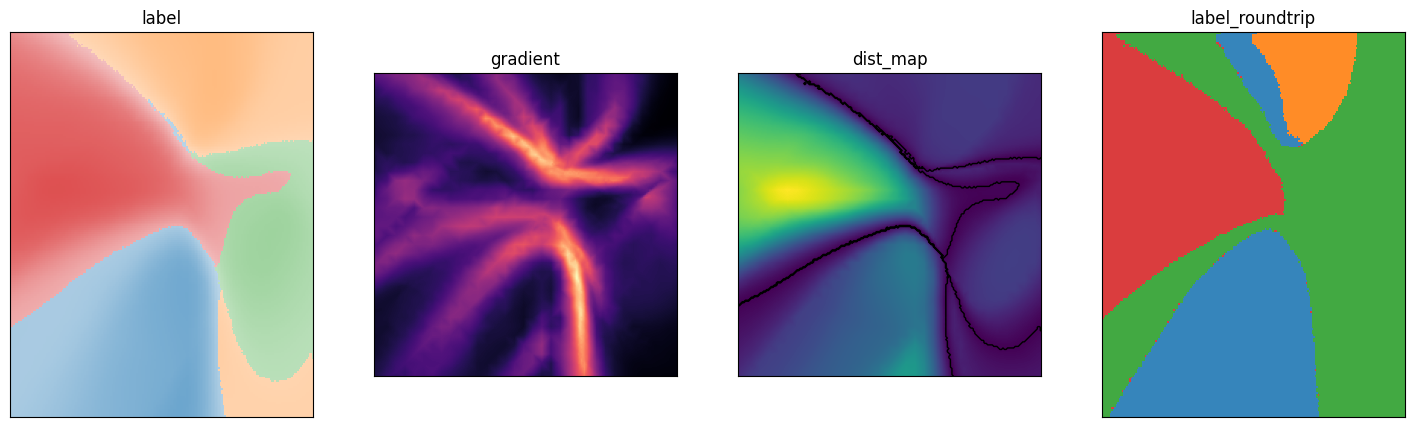

In [6]:
conten_list = ['label', 'gradient',  'dist_map', 'label_roundtrip',]
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=200)
    ax[i].set_title(content)

relace the label with the gradient


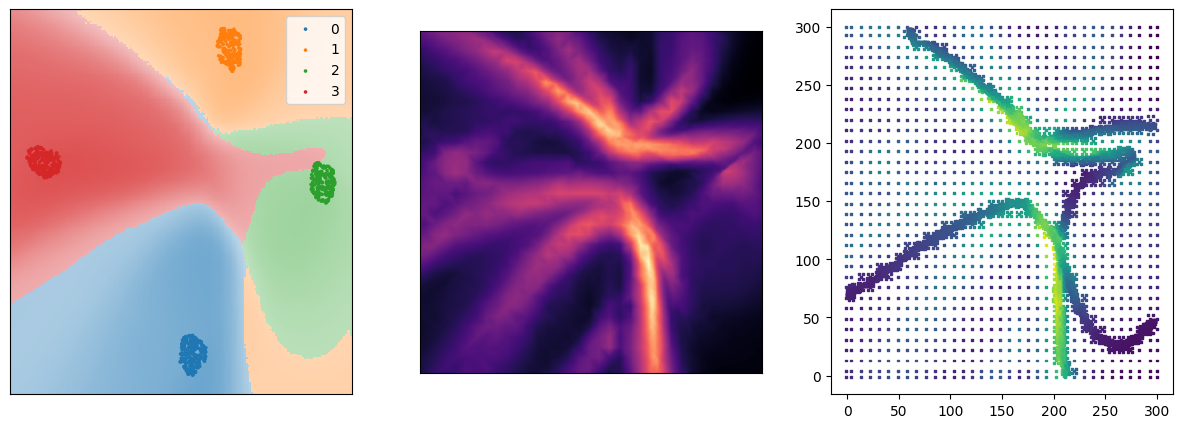

In [7]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=300)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='viridis', marker='s', s=2)
